In [ ]:
import pickle
import gzip
import numpy as np
import scipy
import pandas as pd
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Input, LSTM, Dense, Lambda, Conv1D, Conv2D, AveragePooling2D, AveragePooling1D, Flatten, MaxPooling2D, MaxPooling1D, Dropout
from keras.models import Model
from keras.models import Sequential
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import RMSprop
from keras.applications import imagenet_utils
from keras import backend as K
from time import time
from keras import losses
from sklearn.metrics import  roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, mean_absolute_error
import glob
from PIL import Image
import h5py
import random
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.gaussian_process as gp
import pandas as pd
import pickle
from joblib import dump, load
from sklearn.utils import shuffle
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install silence_tensorflow

In [ ]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Dec 17 03:11:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

rm: cannot remove 'qmc': No such file or directory
rm: cannot remove 'qmc1': No such file or directory
Cloning into 'qmc'...
remote: Enumerating objects: 215, done.
remote: Total 215 (delta 0), reused 0 (delta 0), pack-reused 215
Receiving objects: 100% (215/215), 17.06 MiB | 7.73 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
import qmc.tf.layers as layers
import qmc.tf.models as models

/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.CrossProduct.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.DensityMatrix2Dist.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.DensityMatrixRegression.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ICML2021/triazines/data/triazines', header = None, sep = ' ')
X = data.to_numpy()
y = X[:,-1]
X = X[:,0:-1]

In [ ]:
y.shape

(186,)

In [ ]:
X.shape

(186, 60)

Los labels van de 1 a 5

In [ ]:
print(max(y))
print(min(y))

5.0
1.0


In [ ]:
y = (y-1)/4
y = np.float64(y)
y = y.reshape((186,1))
#X = np.float64(X)

In [ ]:
np.mean(X, axis = 0)

array([0.3855914 , 0.27766667, 0.19675269, 0.14946237, 0.19604839,
       0.29139785, 0.11290323, 0.34086022, 0.39825806, 0.17741935,
       0.1627957 , 0.14300538, 0.1172043 , 0.1172043 , 0.13010753,
       0.13010753, 0.11935484, 0.13870968, 0.13154301, 0.13225806,
       0.20537634, 0.16879032, 0.12150538, 0.12150538, 0.12150538,
       0.12580645, 0.1688172 , 0.18172043, 0.15732796, 0.17956989,
       0.42150538, 0.36612903, 0.28195699, 0.24193548, 0.3409086 ,
       0.30645161, 0.11505376, 0.37526882, 0.2521129 , 0.24623656,
       0.30645161, 0.16537634, 0.        , 0.        , 0.1172043 ,
       0.1172043 , 0.16236559, 0.22903226, 0.17738172, 0.21612903,
       0.41935484, 0.24301075, 0.10430108, 0.10430108, 0.11290323,
       0.12150538, 0.36236559, 0.37526882, 0.29057527, 0.27767204])

In [ ]:
np.std(X, axis = 0)

array([0.16649106, 0.20630843, 0.18980463, 0.16631597, 0.19435538,
       0.20824712, 0.08194649, 0.20854672, 0.35378661, 0.19681826,
       0.14480514, 0.16021493, 0.11604936, 0.11604936, 0.15224834,
       0.15224834, 0.10396243, 0.15029166, 0.13173242, 0.14305521,
       0.23388518, 0.19311455, 0.12939018, 0.12939018, 0.12939018,
       0.14134776, 0.22431664, 0.23138026, 0.16281431, 0.23026826,
       0.15681608, 0.21448379, 0.18150034, 0.23201899, 0.23961119,
       0.23177967, 0.08669094, 0.21132247, 0.18721009, 0.19485817,
       0.26225099, 0.14883461, 0.        , 0.        , 0.09113815,
       0.11604936, 0.15092117, 0.27300819, 0.19575456, 0.28181071,
       0.3521846 , 0.19559551, 0.05850095, 0.05850095, 0.10077742,
       0.12939018, 0.37557525, 0.37320349, 0.26065143, 0.25278131])

In [ ]:
np.median(X, axis = 0)

array([0.42 , 0.233, 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.5  , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.5  , 0.4  , 0.329, 0.1  , 0.367, 0.1  ,
       0.1  , 0.5  , 0.1  , 0.1  , 0.3  , 0.1  , 0.   , 0.   , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.3  , 0.1  , 0.1  , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ])

In [ ]:
X

array([[ 0.20666936,  1.72234035,  0.19097169, ..., -0.73758373,
        -0.7311499 , -0.70286858],
       [-0.75434318, -0.86117017, -0.50974882, ...,  1.40601898,
         1.31372664,  1.40567335],
       [-1.71535573, -0.86117017, -0.50974882, ..., -0.73758373,
        -0.7311499 , -0.70286858],
       ...,
       [-0.75434318, -0.86117017, -0.50974882, ..., -0.73758373,
        -0.7311499 , -0.70286858],
       [ 1.16768191, -0.21650432, -0.50974882, ..., -0.73758373,
        -0.7311499 , -0.70286858],
       [-0.75434318, -0.86117017, -0.50974882, ..., -0.73758373,
        -0.7311499 , -0.70286858]])

Normalizando los datos:

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
from scipy.spatial import distance

distances = distance.cdist(X, X, 'euclidean')

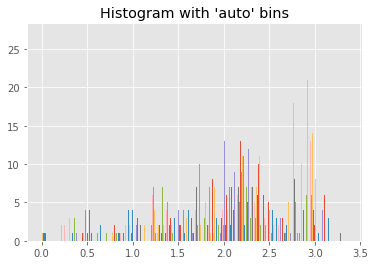

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
_ = plt.hist(distances, bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()

Sigma:

In [ ]:
print(np.mean(distances))
print(np.median(distances))

6.796587951595358
6.828117509217618


Gamma:

In [ ]:
print(1/(np.mean(distances)**2))
print(1/(np.median(distances)**2))

0.02164801685724408
0.021448554409531456


In [ ]:
BIG_MAE=[]
for i in range(20):
    print('----------------------------------------',i)
    number = str(i+1)
    train_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/triazines/data/triazines_train_5.'
    test_path = '/content/drive/My Drive/Colab_Notebooks/ICML2021/triazines/data/triazines_test_5.'
    
    data = pd.read_csv(train_path+number, header = None, sep = ' ')
    X = data.to_numpy()
    y = X[:,-1]
    X = X[:,0:-1]

    y = (y-1)/4
    y = np.float64(y)
    y = y.reshape((100,1))
    X = np.float64(X)

    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)

    MAE_opt = 100
    dim_y = 5
    for i in range(24):

        beta = 1 + np.random.sample()*19.9
        gamma = 0.001+np.random.sample()*0.099
        learning_rate = 0.000000099 + np.random.sample()*0.0009999
        alpha = np.random.sample()
        dim_x = np.random.choice([1024, 512, 256])
        dim_x = int(dim_x)
        num_eig = np.random.choice([int(dim_x/8), int(dim_x/16), int(dim_x/32)])
        num_eig = int(num_eig)

        MAE = []

        fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta)
        fm_x = layers.QFeatureMapRFF(60, dim=dim_x, gamma=gamma, random_state=1)
        qmr2 = models.QMRegressorSGD(input_dim=60, dim_x=dim_x, num_eig=num_eig, dim_y=dim_y, gamma=gamma, random_state=17)

        # for initialize weights

        qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x, dim_y=dim_y)
        
        kf = KFold(n_splits=5)

        #for i in range(5): 
            
        for train, test in kf.split(X):

            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]

            qmr.compile()
            qmr.fit(X_train, y_train, epochs=1, batch_size = 4, verbose = 0)

            qmr2.set_rho(qmr.get_rho())

            # Train model with SGD

            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
            qmr2.layers[0].trainable = True

            def loss(y_true, y_pred):
                return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha * y_pred[:, 1:2]

            qmr2.compile(optimizer, loss=loss)
            qmr2.set_rho(qmr.get_rho())
            early_stop = EarlyStopping( monitor="val_loss",
                                        min_delta=0,
                                        patience=5,
                                        verbose=0,
                                        mode="auto",
                                        restore_best_weights=True,
                                        )

            qmr2.fit(X_train, y_train, epochs=60, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose=0)

            out = qmr2.predict(X_test, batch_size = 4)
            y_pred, std = out[:, 0], np.sqrt(out[:, 1])

            MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

        if np.mean(MAE) < MAE_opt:
            MAE_opt = np.mean(MAE)
            beta_opt = beta
            gamma_opt = gamma
            learning_rate_opt = learning_rate
            alpha_opt = alpha
            dim_x_opt = dim_x   
            num_eig_opt = num_eig

    print('MAE = ',MAE_opt, 'beta = ',beta_opt, 'gamma = ', gamma_opt, 'learning_rate = ', learning_rate_opt, 'alpha = ', alpha_opt, 'dim_x = ', dim_x_opt, 'num_eig = ', num_eig_opt)

    X_train = X
    y_train = y

    X_test = pd.read_csv(test_path+number, header = None, sep = ' ')
    X_test = X_test.to_numpy()
    X_test = np.float64(X_test)
    y_test = X_test[:,-1]
    X_test = X_test[:,0:-1]
    X_test = scaler.transform(X_test)
    y_test = (y_test-1)/4
    y_test = np.float64(y_test)
    y_test = y_test.reshape((86,1))

    fm_y = layers.QFeatureMapSmp(dim=dim_y, beta=beta_opt)
    fm_x = layers.QFeatureMapRFF(60, dim=dim_x_opt, gamma=gamma_opt, random_state=1)
    qmr2 = models.QMRegressorSGD(input_dim=60, dim_x=dim_x_opt, num_eig=num_eig_opt, dim_y=dim_y, gamma=gamma_opt, random_state=17)

    # for initialize weights

    qmr = models.QMRegressor(fm_x=fm_x, fm_y=fm_y, dim_x=dim_x_opt, dim_y=dim_y)
    qmr.compile()
    qmr.fit(X_train, y_train, epochs=1, batch_size = 4)

    qmr2.set_rho(qmr.get_rho())
    # Train model with SGD
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_opt)
    qmr2.layers[0].trainable = True

    def loss(y_true, y_pred):
        return tf.keras.losses.mean_squared_error(y_true, y_pred[:,0:1]) + alpha_opt * y_pred[:, 1:2]

    qmr2.compile(optimizer, loss=loss)
    qmr2.set_rho(qmr.get_rho())
    early_stop = EarlyStopping( monitor="val_loss",
                                min_delta=0,
                                patience=5,
                                verbose=0,
                                mode="auto",
                                restore_best_weights=True,
                                )

    qmr2.fit(X_train, y_train, epochs=100, validation_split = 0.2, batch_size = 4, callbacks = early_stop, verbose = 0)

    out = qmr2.predict(X_test, batch_size = 4)
    y_pred, std = out[:, 0], np.sqrt(out[:, 1])
    print('------------MAE =', mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))
    BIG_MAE.append(mean_absolute_error(np.rint(y_test*4)+1, np.rint(y_pred*4)+1))

---------------------------------------- 0
MAE =  0.62 beta =  15.96616410573462 gamma =  0.07879458631733142 learning_rate =  0.0002781036088842861 alpha =  0.7934015058615052 dim_x =  256 num_eig =  16
25/25 [==============================] - 0s 951us/step
------------MAE = 0.7093023255813954
---------------------------------------- 1
MAE =  0.67 beta =  12.48476285780282 gamma =  0.036037695604617184 learning_rate =  9.581870040132258e-05 alpha =  0.14654570290609203 dim_x =  256 num_eig =  8
25/25 [==============================] - 0s 1ms/step
------------MAE = 0.7093023255813954
---------------------------------------- 2
MAE =  0.6900000000000001 beta =  15.141225948206198 gamma =  0.062099329973833495 learning_rate =  0.0003123957567040436 alpha =  0.7923281165301335 dim_x =  256 num_eig =  16
25/25 [==============================] - 0s 1ms/step
------------MAE = 0.6976744186046512
---------------------------------------- 3
MAE =  0.68 beta =  17.069582227515273 gamma =  0.031866

In [ ]:
print(np.mean(BIG_MAE))
print(np.std(BIG_MAE))

0.6970930232558139
0.009356672639204134


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/ICML2021/triazines/data/triazines', header = None, sep = ' ')
X = data.to_numpy()

X = X[:,0:-1]

In [ ]:
data1 = pd.DataFrame(X)

In [ ]:
X = np.loadtxt('/content/drive/My Drive/Colab_Notebooks/qmr_losses_experiments/triazines.dat')

X = X[:,1:61]

In [ ]:
data2 = pd.DataFrame(X)

In [ ]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    #diff_df.to_csv('data/diff.csv')
    return diff_df

In [ ]:
dataframe_difference(data1, data2, which=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,_merge
